In [10]:
'''
! pip install pandas
! conda install -c conda-forge pyts

'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as spio


In this stage we are going to load all the dataset for the case western reverse university dataset for bearings. Then we try to create a class that generate the image representetive of the timeseries by sliding a nonoverlaping window.

In [17]:
Data = "DataSetA.mat"
mat = spio.loadmat(Data, squeeze_me=True) # Load the dataset
data = {}
Raw= []

##-----------import each data set into the data  
for i in range(1,len(mat)-2): 
    data[i-1]=mat.get('C{}'.format(i))
    # print("Class : ",(i-1)%10, "Imported :)")
data.keys()

# print(mat.keys())
# for cl in mat.keys():
    
# C1 = mat.get('C2')
# C1.size
# X = C1[0:1000].reshape(-1,1)

# plt.plot(X)
# X.shape

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

/home/brash/anaconda3/envs/RL_GAN_CWRU/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


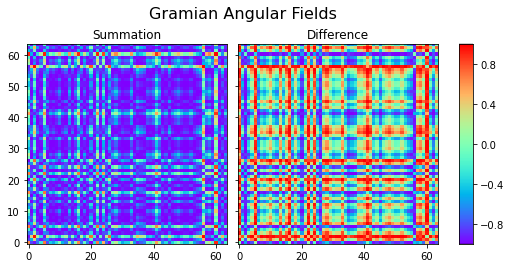

In [7]:
from pyts.image import GramianAngularField
from mpl_toolkits.axes_grid1 import ImageGrid
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=64,method='summation')
X_gasf = gasf.fit_transform(X.T)

gadf = GramianAngularField(image_size=64, method='difference')
X_gadf = gadf.transform(X.T)


# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

In [8]:
X_gasf.shape

(1, 64, 64)